In [34]:
# Purpose: Compute entropy and statistical features from processed sectoral index data.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

# Add parent directory to Python path so it can find 'scripts'
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'scripts')))

from entropy_measures import *
from feature_utils import *

# from scripts.entropy_measures import *
# from scripts.feature_utils import *
import os

In [35]:
# Load cleaned returns data
DATA_PATH = '../data/processed/returns_data.csv'  # This should be a daily return DataFrame with datetime index
returns_df = pd.read_csv(DATA_PATH, index_col=0, parse_dates=True)


In [36]:
# Initialize result container
features_df = pd.DataFrame(index=returns_df.index)

# Rolling entropy window size
window = 20

In [37]:
features_df = pd.DataFrame(index=returns_df.index)


In [38]:
for col in returns_df.columns:
    # Entropy-based features                
    features_df[f'{col}_shannon'] = rolling_shannon_entropy(returns_df[col], window=window)
    features_df[f'{col}_perm'] = rolling_permutation_entropy(returns_df[col], window=window)
    features_df[f'{col}_sample'] = rolling_sample_entropy(returns_df[col], window=50)

    # Volatility & dispersion measures
    features_df[f'{col}_real_vol'] = realized_volatility(returns_df[col], window=window)
    features_df[f'{col}_zscore'] = z_score(returns_df[col], window=window)
    features_df[f'{col}_skew'] = rolling_skew(returns_df[col], window=window)
    features_df[f'{col}_kurt'] = rolling_kurtosis(returns_df[col], window=window)


✅ Feature engineering complete. Saved to 'data/processed/feature_matrix.csv'


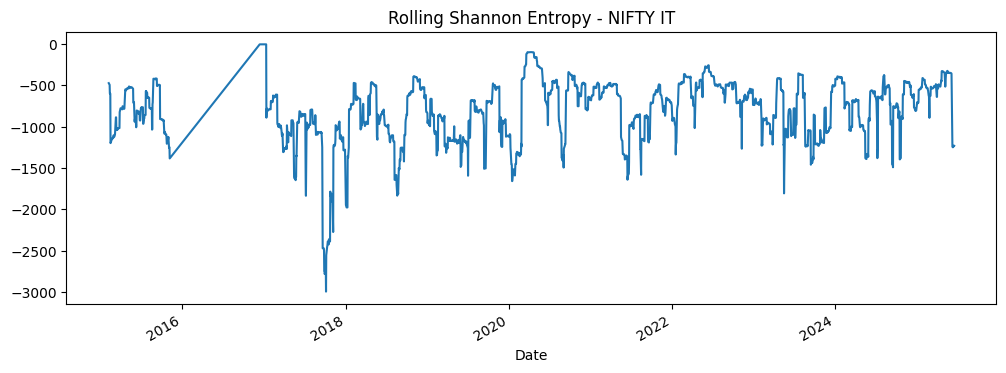

In [39]:
# Save the engineered features
features_df.to_csv('../data/processed/feature_matrix.csv')
print("✅ Feature engineering complete. Saved to 'data/processed/feature_matrix.csv'")

# Visualize an example: Shannon entropy of NIFTY_IT
features_df['NIFTY_IT_shannon'].plot(title='Rolling Shannon Entropy - NIFTY IT', figsize=(12,4))
plt.show()


In [40]:
features_df.shape

(2269, 42)

In [41]:
features_df.head(70)

,NIFTY_IT_shannon,NIFTY_IT_perm,NIFTY_IT_sample,NIFTY_IT_real_vol,NIFTY_IT_zscore,NIFTY_IT_skew,NIFTY_IT_kurt,NIFTY_BANK_shannon,NIFTY_BANK_perm,NIFTY_BANK_sample,...,NIFTY_AUTO_zscore,NIFTY_AUTO_skew,NIFTY_AUTO_kurt,NIFTY_METAL_shannon,NIFTY_METAL_perm,NIFTY_METAL_sample,NIFTY_METAL_real_vol,NIFTY_METAL_zscore,NIFTY_METAL_skew,NIFTY_METAL_kurt
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-29,-537.537707,0.989464,1.897120,0.014750,0.596607,-0.866228,0.700125,-613.064072,0.952169,2.302585,...,-0.197087,0.457329,-0.266019,-764.583749,0.900451,inf,0.011829,-0.387474,-0.048613,-0.377280
2015-05-04,-537.537707,0.989464,2.036882,0.014821,0.923628,-0.856857,0.663333,-590.367405,0.962704,2.233592,...,1.521313,0.311681,-0.541448,-771.037133,0.889915,inf,0.012084,1.195369,-0.224604,-0.431719
2015-05-05,-539.197444,0.989464,2.036882,0.014794,0.182159,-0.940407,0.787465,-592.659481,0.952169,2.268684,...,0.026280,0.335068,-0.524108,-677.228807,0.919721,2.484907,0.013320,1.790173,-0.083706,-0.589072


In [42]:
features_df.tail()

,NIFTY_IT_shannon,NIFTY_IT_perm,NIFTY_IT_sample,NIFTY_IT_real_vol,NIFTY_IT_zscore,NIFTY_IT_skew,NIFTY_IT_kurt,NIFTY_BANK_shannon,NIFTY_BANK_perm,NIFTY_BANK_sample,...,NIFTY_AUTO_zscore,NIFTY_AUTO_skew,NIFTY_AUTO_kurt,NIFTY_METAL_shannon,NIFTY_METAL_perm,NIFTY_METAL_sample,NIFTY_METAL_real_vol,NIFTY_METAL_zscore,NIFTY_METAL_skew,NIFTY_METAL_kurt
Date,,,,,,,,,,,,,,,,,,,,,
2025-06-12,-1249.049758,0.811842,1.435085,0.009421,-0.913445,0.061565,-1.378165,-1718.192702,0.978928,1.609438,...,-1.747337,-0.606557,0.027666,-1009.023401,0.962704,1.455287,0.008867,-1.847307,-0.183431,-0.170584
2025-06-13,-1240.254049,0.795618,1.343735,0.009199,-0.045371,-0.034058,-1.266574,-1687.043803,0.952169,1.609438,...,-0.256398,-0.493465,0.065905,-1001.727168,0.978928,1.421386,0.009163,-1.085911,-0.097496,-0.460901
2025-06-16,-1231.458340,0.795618,1.386294,0.009177,1.469888,-0.105225,-1.229710,-1669.433653,0.952169,1.609438,...,0.360275,-0.472637,0.117102,-1001.727168,0.978928,1.540445,0.009453,1.046227,-0.175762,-0.657438
2025-06-17,-1237.170286,0.811842,1.427116,0.009078,0.497130,-0.281898,-1.118836,-1687.043803,0.952169,1.609438,...,-0.715656,-0.024350,-0.122490,-996.988984,0.978928,1.421386,0.009946,-1.485804,-0.195914,-0.844016
2025-06-18,-1231.458340,0.768858,1.945910,0.009342,-1.096629,-0.101392,-1.293397,-1677.779551,0.925409,1.568616,...,0.605841,-0.005854,0.053972,-988.727518,0.978928,1.321756,0.010001,-0.692452,-0.025798,-0.910342


In [43]:
features_df[['NIFTY_IT_shannon', 'NIFTY_IT_real_vol']].tail()

,NIFTY_IT_shannon,NIFTY_IT_real_vol
Date,,
2025-06-12,-1249.049758,0.009421
2025-06-13,-1240.254049,0.009199
2025-06-16,-1231.458340,0.009177
2025-06-17,-1237.170286,0.009078
2025-06-18,-1231.458340,0.009342


In [44]:
# # Drop rows where *all* features are NaN (typically top rows from rolling windows)
# features_df = features_df.dropna(how='all')

# # Optionally, drop rows where any feature is NaN or inf (more strict)
# features_df.replace([np.inf, -np.inf], np.nan, inplace=True)
# features_df = features_df.dropna()

# # Save cleaned features
# features_df.to_csv('../data/processed/feature_matrix.csv')
# print(f"✅ Final feature matrix saved with shape: {features_df.shape}")


In [45]:
# Drop first 60 rows explicitly
features_df = features_df.iloc[60:]

# Save the cleaned feature matrix
features_df.to_csv('../data/processed/feature_matrix.csv')
print(f"✅ Dropped first 60 rows. Final shape: {features_df.shape}")


✅ Dropped first 60 rows. Final shape: (2209, 42)


In [46]:
features_df.head(60)

,NIFTY_IT_shannon,NIFTY_IT_perm,NIFTY_IT_sample,NIFTY_IT_real_vol,NIFTY_IT_zscore,NIFTY_IT_skew,NIFTY_IT_kurt,NIFTY_BANK_shannon,NIFTY_BANK_perm,NIFTY_BANK_sample,...,NIFTY_AUTO_zscore,NIFTY_AUTO_skew,NIFTY_AUTO_kurt,NIFTY_METAL_shannon,NIFTY_METAL_perm,NIFTY_METAL_sample,NIFTY_METAL_real_vol,NIFTY_METAL_zscore,NIFTY_METAL_skew,NIFTY_METAL_kurt
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-21,-552.707167,0.989464,2.351375,0.013697,0.239529,-0.985478,1.626728,-585.285068,0.954870,2.233592,...,-0.981589,0.124755,-1.101556,-727.930369,0.769354,2.484907,0.012495,0.208857,0.088255,-0.741967
2015-04-22,-552.707167,0.989464,2.251292,0.013648,-0.169585,-1.029538,1.740783,-598.322371,0.954870,2.197225,...,0.201722,0.000545,-0.954131,-727.930369,0.846932,2.397895,0.012220,0.434272,-0.077306,-0.596834
2015-04-23,-563.563579,0.989464,2.995732,0.013349,0.039648,-1.000107,1.943185,-598.322371,0.954870,2.233592,...,-0.339120,0.050847,-0.977463,-737.330967,0.873692,2.397895,0.012023,1.082369,-0.251618,-0.460949
2015-04-27,-541.280173,0.989464,1.704748,0.014672,-1.764640,-0.802058,0.674070,-616.280524,0.954870,2.233592,...,-0.202858,0.131871,-0.742030,-764.583749,0.919721,inf,0.011787,-0.105742,-0.144965,-0.328640
2015-04-28,-541.280173,0.978928,1.897120,0.014655,0.081153,-0.852754,0.744377,-595.741914,0.944334,2.302585,...,2.302733,0.443760,-0.266646,-764.583749,0.919721,inf,0.011780,-0.091804,-0.102423,-0.329287
2015-04-29,-537.537707,0.989464,1.897120,0.014750,0.596607,-0.866228,0.700125,-613.064072,0.952169,2.302585,...,-0.197087,0.457329,-0.266019,-764.583749,0.900451,inf,0.011829,-0.387474,-0.048613,-0.377280
2015-05-04,-537.537707,0.989464,2.036882,0.014821,0.923628,-0.856857,0.663333,-590.367405,0.962704,2.233592,...,1.521313,0.311681,-0.541448,-771.037133,0.889915,inf,0.012084,1.195369,-0.224604,-0.431719
2015-05-05,-539.197444,0.989464,2.036882,0.014794,0.182159,-0.940407,0.787465,-592.659481,0.952169,2.268684,...,0.026280,0.335068,-0.524108,-677.228807,0.919721,2.484907,0.013320,1.790173,-0.083706,-0.589072
2015-05-06,-516.914038,1.000000,1.832581,0.015240,-1.021004,-0.768620,0.257990,-496.989720,0.978928,2.197225,...,-2.116217,-0.077180,-0.241946,-517.459829,0.944334,2.484907,0.015362,-2.152828,-0.376743,-0.427666


In [47]:
features_df.head(-60)

,NIFTY_IT_shannon,NIFTY_IT_perm,NIFTY_IT_sample,NIFTY_IT_real_vol,NIFTY_IT_zscore,NIFTY_IT_skew,NIFTY_IT_kurt,NIFTY_BANK_shannon,NIFTY_BANK_perm,NIFTY_BANK_sample,...,NIFTY_AUTO_zscore,NIFTY_AUTO_skew,NIFTY_AUTO_kurt,NIFTY_METAL_shannon,NIFTY_METAL_perm,NIFTY_METAL_sample,NIFTY_METAL_real_vol,NIFTY_METAL_zscore,NIFTY_METAL_skew,NIFTY_METAL_kurt
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-21,-552.707167,0.989464,2.351375,0.013697,0.239529,-0.985478,1.626728,-585.285068,0.954870,2.233592,...,-0.981589,0.124755,-1.101556,-727.930369,0.769354,2.484907,0.012495,0.208857,0.088255,-0.741967
2015-04-22,-552.707167,0.989464,2.251292,0.013648,-0.169585,-1.029538,1.740783,-598.322371,0.954870,2.197225,...,0.201722,0.000545,-0.954131,-727.930369,0.846932,2.397895,0.012220,0.434272,-0.077306,-0.596834
2015-04-23,-563.563579,0.989464,2.995732,0.013349,0.039648,-1.000107,1.943185,-598.322371,0.954870,2.233592,...,-0.339120,0.050847,-0.977463,-737.330967,0.873692,2.397895,0.012023,1.082369,-0.251618,-0.460949
2015-04-27,-541.280173,0.989464,1.704748,0.014672,-1.764640,-0.802058,0.674070,-616.280524,0.954870,2.233592,...,-0.202858,0.131871,-0.742030,-764.583749,0.919721,inf,0.011787,-0.105742,-0.144965,-0.328640
2015-04-28,-541.280173,0.978928,1.897120,0.014655,0.081153,-0.852754,0.744377,-595.741914,0.944334,2.302585,...,2.302733,0.443760,-0.266646,-764.583749,0.919721,inf,0.011780,-0.091804,-0.102423,-0.329287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-12,-539.625484,0.944334,2.833213,0.013979,-1.596883,-0.631250,1.043726,-2415.428588,0.960558,1.609438,...,0.643309,-0.496654,1.071226,-511.265173,0.960558,inf,0.014851,-0.579117,0.269731,0.183456
2025-03-13,-539.625484,0.944334,2.197225,0.013982,0.144741,-0.635471,1.044325,-2453.917642,0.978928,1.609438,...,-0.482951,-0.454604,0.968275,-503.459552,0.933798,inf,0.015088,-0.774304,0.383208,0.077356
2025-03-17,-531.779372,0.978928,2.140066,0.014065,0.504976,-0.729641,1.056124,-2453.917642,0.978928,1.658228,...,0.888907,-0.509317,0.750041,-503.459552,0.899204,inf,0.015079,0.312287,0.388523,0.087018


In [48]:
features_df.tail(60)

,NIFTY_IT_shannon,NIFTY_IT_perm,NIFTY_IT_sample,NIFTY_IT_real_vol,NIFTY_IT_zscore,NIFTY_IT_skew,NIFTY_IT_kurt,NIFTY_BANK_shannon,NIFTY_BANK_perm,NIFTY_BANK_sample,...,NIFTY_AUTO_zscore,NIFTY_AUTO_skew,NIFTY_AUTO_kurt,NIFTY_METAL_shannon,NIFTY_METAL_perm,NIFTY_METAL_sample,NIFTY_METAL_real_vol,NIFTY_METAL_zscore,NIFTY_METAL_skew,NIFTY_METAL_kurt
Date,,,,,,,,,,,,,,,,,,,,,
2025-03-20,-511.282577,0.989464,2.564949,0.014917,1.244658,-0.559136,0.531977,-1406.285883,0.925964,1.609438,...,0.922316,-0.659862,0.427308,-520.089394,0.899204,inf,0.014861,0.387768,0.103386,-0.105642
2025-03-21,-518.044066,0.989464,1.791759,0.014897,0.413250,-0.693521,0.669262,-1406.285883,0.944334,1.504077,...,0.393542,-0.711272,0.428093,-518.037676,0.815383,inf,0.014972,-0.687178,0.258315,-0.135232
2025-03-24,-515.381936,0.978928,1.871802,0.015498,1.199558,-0.664158,0.386767,-1276.843415,0.903497,1.558145,...,0.550421,-0.709299,0.491969,-528.732437,0.856221,inf,0.014583,0.154999,0.362638,0.181635
2025-03-25,-509.389990,0.960558,2.564949,0.015971,1.045911,-0.734667,0.258232,-1266.952713,0.944334,1.504077,...,-0.662112,-0.768065,1.230293,-525.973243,0.899204,inf,0.015061,-1.133895,0.477437,0.031901
2025-03-26,-522.143425,0.960558,2.564949,0.015047,-0.473025,-0.847970,0.969904,-1266.952713,0.944334,1.504077,...,-0.013615,-0.748770,1.215568,-583.358677,0.899204,inf,0.013993,-0.551392,0.694087,0.306891
2025-03-27,-509.389990,0.944334,2.564949,0.015106,0.510813,-0.966052,1.080040,-1266.952713,0.917574,1.446919,...,-0.680406,-0.587945,0.918863,-667.061967,0.933798,inf,0.013240,0.138580,0.728476,0.578310
2025-03-28,-486.898754,0.971094,2.708050,0.015504,-0.972279,-0.819826,0.582212,-1266.952713,0.847831,1.446919,...,-0.699418,-0.626571,1.152749,-667.061967,0.960558,inf,0.013524,-0.866955,0.783022,0.458467
2025-04-01,-640.575687,0.978928,2.014903,0.013459,-1.711059,-0.281349,-0.556673,-1006.480791,0.833753,1.504077,...,-0.407481,0.507612,-0.410506,-680.869702,0.946481,2.772589,0.013178,-0.985371,0.877281,0.597933
2025-04-02,-640.575687,0.978928,2.639057,0.013478,0.755540,-0.282499,-0.564904,-1013.721553,0.815383,1.446919,...,0.533251,0.421088,-0.537840,-685.092669,0.946481,1.734601,0.013086,0.198039,0.943570,0.764116
